In [2]:
using DataFrames
using Chemfiles
using MIToS.PDB
using Gadfly
using Cairo
set_default_plot_size(40cm, 14cm)

home1 = "/home/german/labo/18/egfr/1cavidad"
home_rtdos = "/home/german/labo/18/egfr/rtdos_log"
aa = 277

277

In [3]:
function tognm(vtor_anm)
    vtor_gnm = Array{Float64}(convert(Int64, length(vtor_anm)/3));
    vtor_anm =  vtor_anm.^2
    for i=1:convert(Int64, length(vtor_anm)/3)
        vtor_gnm[i] = sqrt(vtor_anm[i*3-2] + vtor_anm[i*3-1] + vtor_anm[i*3])
    end
    return vtor_gnm
end

tognm (generic function with 1 method)

In [4]:
function WeightedHist(in_vec, in_bins, in_weight, density = false)
    # Safety check    
    if length(in_vec) != length(in_weight)
        println("Each element of the input vector needs one weight")
        return
    end
    
    # Prepare variables
    out_counts = Array{Float64}(length(in_bins)-1)
    
    # Get weighted histogram
    for i=1:length(in_bins)-1
        if i == 1
            # Include those that fall before the beggining of the bins
            temp_bool = (in_vec .>= in_bins[i]) .& (in_vec .< in_bins[i+1]) .| (in_vec .<= in_bins[i])
            out_counts[i] = sum(in_weight[temp_bool])
        elseif i == length(in_bins)-1
            # Include those that fall after the end of the bins
            temp_bool = (in_vec .>= in_bins[i]) .& (in_vec .< in_bins[i+1]) .| (in_vec .>= in_bins[end])
            out_counts[i] = sum(in_weight[temp_bool])
        else
            temp_bool = (in_vec .>= in_bins[i]) .& (in_vec .< in_bins[i+1])
            out_counts[i] = sum(in_weight[temp_bool])
        end
    end
    
    # Get bins middle points
    out_middle = (in_bins[1:end-1] + in_bins[2:end]) / 2
    
    # Turn counts into density
    if (density == true)
        out_counts = out_counts ./ sum(out_counts) 
    end
    return out_counts, out_middle
end

WeightedHist (generic function with 2 methods)

# Cavidad

In [6]:
# Leo nombres de structuras
tmp = readdlm(joinpath(home1, "pdbs.list"))
pdbs_list = convert(Array{String, 1}, reshape(tmp, length(tmp)));
aa = 277
aa_3 = aa * 3
aa_36 = aa_3 - 6
structs = length(pdbs_list)

# Leo activas e inactivas
tmp = readdlm(joinpath(home1, "am.list"))
am_list = convert(Array{String, 1}, reshape(tmp, length(tmp)));

tmp = readdlm(joinpath(home1, "im.list"))
im_list = convert(Array{String, 1}, reshape(tmp, length(tmp)));

cfg_filename = joinpath(home1, "egfr.cfg")

"/home/german/labo/18/egfr/1cavidad/egfr.cfg"

In [7]:
# IM
der_im_1 = Array{Float64}(length(im_list))
der_im_2 = Array{Float64}(length(im_list))
for i = 1:length(im_list)
    each = im_list[i]
    in_pdb_filename_1_neg = joinpath(home1, each, string("neg_modo1_", each, ".pdb"))
    in_pdb_filename_1_pos = joinpath(home1, each, string("pos_modo1_", each, ".pdb"))
    in_pdb_filename_2_neg = joinpath(home1, each, string("neg_modo2_", each, ".pdb"))
    in_pdb_filename_2_pos = joinpath(home1, each, string("pos_modo2_", each, ".pdb"))

    out_filename_1_neg = joinpath(home1, each, string("vol_1_neg"))
    out_filename_1_pos = joinpath(home1, each, string("vol_1_pos"))
    out_filename_2_neg = joinpath(home1, each, string("vol_2_neg"))
    out_filename_2_pos = joinpath(home1, each, string("vol_2_pos"))

    run(pipeline(`ANA $in_pdb_filename_1_neg -c $cfg_filename`, stdout = out_filename_1_neg))
    run(pipeline(`ANA $in_pdb_filename_1_pos -c $cfg_filename`, stdout = out_filename_1_pos))
    run(pipeline(`ANA $in_pdb_filename_2_neg -c $cfg_filename`, stdout = out_filename_2_neg))
    run(pipeline(`ANA $in_pdb_filename_2_pos -c $cfg_filename`, stdout = out_filename_2_pos))

    vol_1_neg = readdlm(out_filename_1_neg)[end]
    vol_1_pos = readdlm(out_filename_1_pos)[end]
    vol_2_neg = readdlm(out_filename_2_neg)[end]
    vol_2_pos = readdlm(out_filename_2_pos)[end]

    der_im_1[i] = vol_1_pos - vol_1_neg
    der_im_2[i] = vol_2_pos - vol_2_neg    
end
der_im_1 = abs.(der_im_1)
der_im_2 = abs.(der_im_2);

15-element Array{Float64,1}:
  24.14 
 129.95 
 156.662
  85.08 
   0.46 
  92.338
  76.18 
  17.07 
  81.18 
 137.34 
  52.626
 209.34 
  82.39 
  90.45 
  54.82 

In [8]:
# AM
der_am_1 = Array{Float64}(length(am_list))
der_am_2 = Array{Float64}(length(am_list))
for i = 1:length(am_list)
    each = am_list[i]
    in_pdb_filename_1_neg = joinpath(home1, each, string("neg_modo1_", each, ".pdb"))
    in_pdb_filename_1_pos = joinpath(home1, each, string("pos_modo1_", each, ".pdb"))
    in_pdb_filename_2_neg = joinpath(home1, each, string("neg_modo2_", each, ".pdb"))
    in_pdb_filename_2_pos = joinpath(home1, each, string("pos_modo2_", each, ".pdb"))

    out_filename_1_neg = joinpath(home1, each, string("vol_1_neg"))
    out_filename_1_pos = joinpath(home1, each, string("vol_1_pos"))
    out_filename_2_neg = joinpath(home1, each, string("vol_2_neg"))
    out_filename_2_pos = joinpath(home1, each, string("vol_2_pos"))

    run(pipeline(`ANA $in_pdb_filename_1_neg -c $cfg_filename`, stdout = out_filename_1_neg))
    run(pipeline(`ANA $in_pdb_filename_1_pos -c $cfg_filename`, stdout = out_filename_1_pos))
    run(pipeline(`ANA $in_pdb_filename_2_neg -c $cfg_filename`, stdout = out_filename_2_neg))
    run(pipeline(`ANA $in_pdb_filename_2_pos -c $cfg_filename`, stdout = out_filename_2_pos))

    vol_1_neg = readdlm(out_filename_1_neg)[end]
    vol_1_pos = readdlm(out_filename_1_pos)[end]
    vol_2_neg = readdlm(out_filename_2_neg)[end]
    vol_2_pos = readdlm(out_filename_2_pos)[end]

    der_am_1[i] = vol_1_pos - vol_1_neg
    der_am_2[i] = vol_2_pos - vol_2_neg
end

der_am_1 = abs.(der_am_1)
der_am_2 = abs.(der_am_2);

## Grafico

In [18]:
# Vec 1
hbins = collect(minimum(der_im_1):20.0:maximum(der_im_1))
hweights_im = repeat([1.0], inner = [length(der_im_1)])
hweights_am = repeat([1.0], inner = [length(der_am_1)])

counts_im, bins = WeightedHist(der_im_1, hbins, hweights_im, true)
counts_am, bins = WeightedHist(der_am_1, hbins, hweights_am, true)


df_hist_der_vec1 = DataFrame(Probability = [counts_am ; counts_im],
    ΔVol = [ bins ; bins ],
    Conformer = repeat(["AM" ; "IM"], inner = [ length(bins)]));

# Vec 2
hbins = collect(minimum(der_im_2):20.:maximum(der_im_2) + 100)
hweights_im = repeat([1.0], inner = [length(der_im_2)])
hweights_am = repeat([1.0], inner = [length(der_am_2)])

counts_im, bins = WeightedHist(der_im_1, hbins, hweights_im, true)
counts_am, bins = WeightedHist(der_am_1, hbins, hweights_am, true)


df_hist_der_vec2 = DataFrame(Probability = [counts_am ; counts_im],
    ΔVol = [ bins ; bins ],
    Conformer = repeat(["AM" ; "IM"], inner = [ length(bins)]));

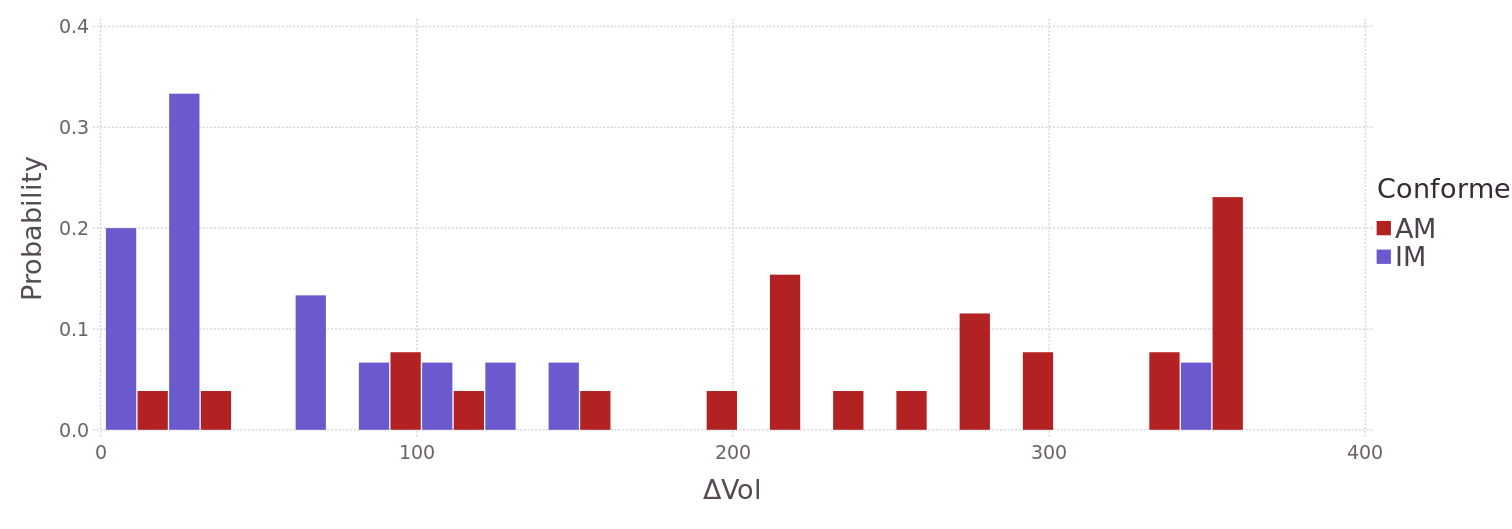

In [15]:
pdf_hist_der_vec1 = plot(df_hist_der_vec1, x="ΔVol", y="Probability", color = "Conformer", 
    Geom.bar(position = :dodge),

    #Guide.title("Figure 2.AA"),
    #Guide.ylabel("δV * Probability", orientation=:vertical), 
    #Guide.yticks(ticks = collect(0.25:0.25:1.0)),
    #Coord.cartesian(xmin = 0, xmax = 15),
    Scale.color_discrete_manual("Firebrick","SlateBlue"),


    Theme(bar_spacing = 2pt, grid_line_width=1pt, key_label_font_size = 20pt,
        minor_label_font_size = 14pt, major_label_font_size = 20pt, key_title_font_size = 20pt))

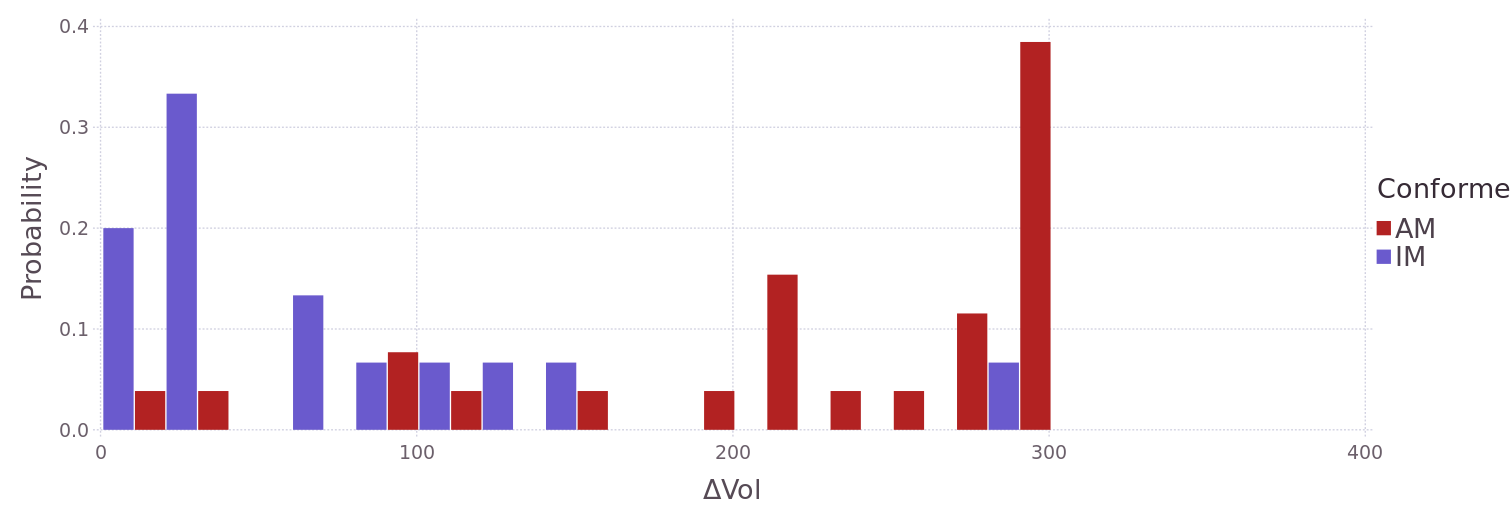

In [19]:
pdf_hist_der_vec2 = plot(df_hist_der_vec2, x="ΔVol", y="Probability", color = "Conformer", 
    Geom.bar(position = :dodge),

    #Guide.title("Figure 2.AA"),
    #Guide.ylabel("δV * Probability", orientation=:vertical), 
    #Guide.yticks(ticks = collect(0.25:0.25:1.0)),
    #Coord.cartesian(xmin = 0, xmax = 15),
    Scale.color_discrete_manual("Firebrick","SlateBlue"),


    Theme(bar_spacing = 2pt, grid_line_width=1pt, key_label_font_size = 20pt,
        minor_label_font_size = 14pt, major_label_font_size = 20pt, key_title_font_size = 20pt))

### Idem, pero con densidades

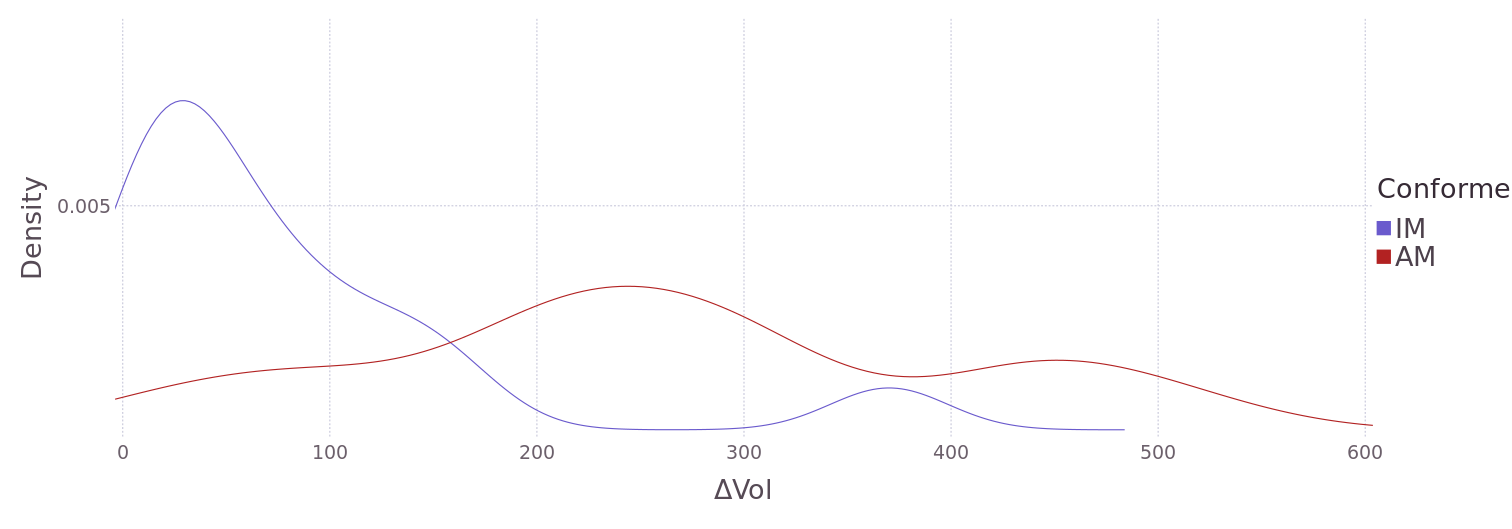

In [26]:
df_der_vec1 = DataFrame(ΔVol = [der_im_1 ; der_am_1],
    Conformer = [ fill("IM", length(der_im_1)) ; fill("AM", length(der_am_1)) ]);

pdf_der_vec1 = plot(df_der_vec1, x="ΔVol", color = "Conformer",
    Geom.density,

    Guide.ylabel("Density", orientation=:vertical),
    #Guide.yticks(ticks = collect(2.5:2.5:10), orientation = :horizontal),
    Coord.cartesian(xmin = 0., xmax = 600, ymax = .009),
    Scale.color_discrete_manual("SlateBlue", "Firebrick"),
    #Guide.colorkey(title="Conformer", pos=[0.02w, -0.36h], labels = ["Inactive", "Active"]),

    Theme(bar_spacing = 2pt, grid_line_width=1pt, key_label_font_size = 20pt,
        minor_label_font_size = 14pt, major_label_font_size = 20pt, key_title_font_size = 20pt))

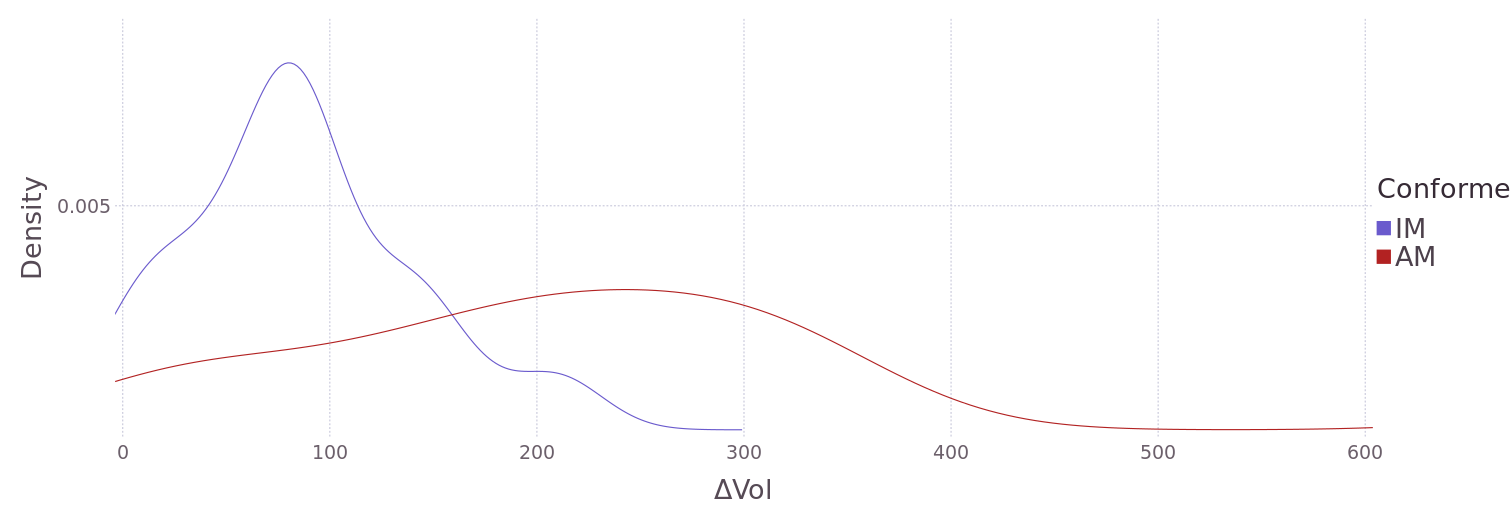

In [25]:
df_der_vec2 = DataFrame(ΔVol = [der_im_2 ; der_am_2],
    Conformer = [ fill("IM", length(der_im_2)) ; fill("AM", length(der_am_2)) ]);

pdf_der_vec2 = plot(df_der_vec2, x="ΔVol", color = "Conformer", 
    Geom.density,

    Guide.ylabel("Density", orientation=:vertical), 
    #Guide.yticks(ticks = collect(2.5:2.5:10), orientation = :horizontal),
    Coord.cartesian(xmin = 0., xmax = 600, ymax = .009),
    Scale.color_discrete_manual("SlateBlue", "Firebrick"),
    #Guide.colorkey(title="Conformer", pos=[0.02w, -0.36h], labels = ["Inactive", "Active"]),

    Theme(bar_spacing = 2pt, grid_line_width=1pt, key_label_font_size = 20pt,
        minor_label_font_size = 14pt, major_label_font_size = 20pt, key_title_font_size = 20pt))

## Guardo resultados

In [33]:
# IM
writedlm(joinpath(home_rtdos, "der_im_1"), der_im_1)
writedlm(joinpath(home_rtdos, "der_im_2"), der_im_2)

# AM
writedlm(joinpath(home_rtdos, "der_am_1"), der_am_1)
writedlm(joinpath(home_rtdos, "der_am_2"), der_am_2)